# In this project we are going to predict the type of Iris flower based on sepal length, sepal width, petal length and petal width.
 
## The various kinds of iris flowers are Iris Setosa, Iris Versicolour and Iris Virginica. This is what we're going to predict, given the features of the flower.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
iris_dataset = pd.read_csv('Iris.csv')

In [3]:
iris_dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_dataset = iris_dataset.drop(['Id'], axis=1)

## Let us look at the count of entries per category of flower

In [5]:
iris_dataset['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

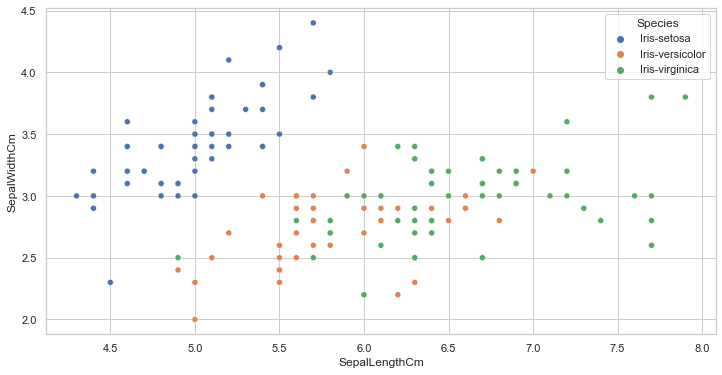

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris_dataset, legend='brief')

## Setosa category can be seen as a cluster. However the Versicolor and Virginica categories overlap.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

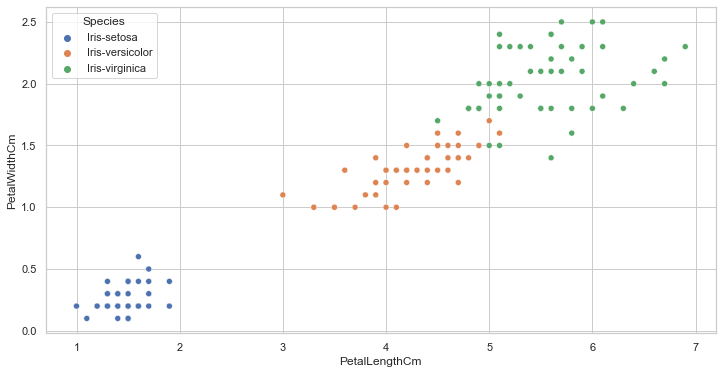

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris_dataset, legend='brief')

## Here Versicolor and Verginica are somewhat separated.
## Let us look at the pairplot now.

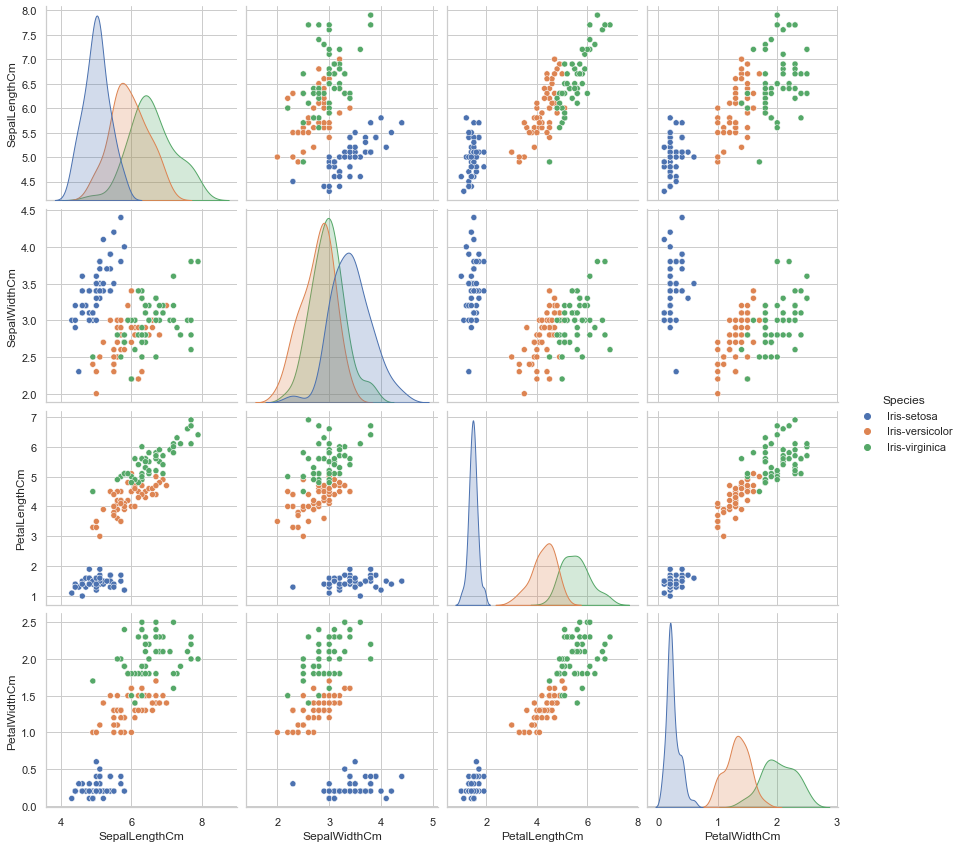

In [8]:
sns.pairplot(iris_dataset, hue='Species', height=3)

## What we can infer from the above pairplot is that petal length vs petal width scatterplot has clustered the sets in the best possible way among all the other plots as the setosa class is totally isolated. Also, the other two classes are somewhat separated.
## The petal width pdf is the best among other pdf graphs since there is least overlapping among classes.

### One thing to be noted here is that we cannot use pairplot when the dataset has many features as that would result in generation of huge number of plots which is inconvenient in many ways.

### Let's assign values to each class of flower. (Setosa-1; Versicolor-2; Virginica-3)

In [9]:
iris_dataset['Species'] = iris_dataset['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})

In [10]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
iris_dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [43]:
iris_array = np.array(iris_dataset)
X = iris_array[:, :-1]
y = iris_array[:, -1]

## We'll use train_test_split from sklearn to randomly select a part of dataset for training and the remaining part for testing.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## We are going to employ Logistic Regression to predict the category of iris flower. We've noticed that the clusters are pretty much defined. The way logistic regression is going to work (here in the case of multiple classes) is it's going to detect one category at a time and classify the other two as the other category.

### The cost function that was used for Linear Regression (Least Squared Error) won't be applicable here as in the case of classification problems it will yield a non convex loss function with many local minima.
### This is why a log loss function has been designed where J(h(x), y) = -log(h(x)) if y = 1 & J(h(x), y) = -log(1-h(x)) if y = 0. Combining them we obtain J(h(x), y) = -ylog(h(x)) - (1-y)log(1-h(x)). To minimize the cost function, we have to keep subtracting theta by partial of J (w.r.t. theta) times the learning rate until we find the minimum.
#### *Also one major point to note is this is going to be a multiclass classification problem.

In [45]:
class LogReg:    
    
    def __init__(self, lr=0.1, itr=5000):
        self.lr = lr
        self.itr= itr
        self.thetas = []
        self.class_count = 0
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        entries, features = X.shape
        classes = np.unique(y)
        self.class_count = len(classes)
        for c in classes:
            y_modified = np.where(y == c, 1, 0)
            theta = np.zeros(features)
            for _ in range(self.itr):
                thetaX = np.dot(X, theta)
                h= self.sigmoid(thetaX)
                dtheta = (1/entries)*np.dot(X.T, (h-y_modified))
                theta -= self.lr*dtheta
            self.thetas.append(theta)
            
    def predict(self, X):
        op = []
        X = np.insert(X, 0, 1, axis=1)
        for i in range(len(X)):
            maxh, cat = -1, -1
            for j in range(self.class_count):
                h = self.sigmoid(np.dot(X[i], self.thetas[j]))
                if h > maxh:
                    maxh = h
                    cat = j+1
            op.append(cat)
        return op
    
    def score(self, y_pred, y_actual):
        s = str(round(sum(y_pred==y_actual)/len(y_actual), 4)*100)
        return s+'%'

In [46]:
model = LogReg()
model.fit(X_train, y_train)

In [47]:
y_pred = model.predict(X_test)

In [48]:
model.score(y_pred, y_test)

'93.33%'

## As it turns out, our model predicted 93.3% of the entries correctly. At this stage it is very important to demonstrate the significance of standardizing our feature matrix. There are various kinds of scalers in the sklearn.preprocessing library like minmaxscaler, robustscaler and standardscaler, each applicable for specific situations. We are going to use standard scaler here.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=20)

In [59]:
model = LogReg()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(y_pred, y_test)

'89.52%'

## Although accuracy has decreased, it must be noted that we've used a smaller set of training data in this case. Standardization is a very vital requirement for the feature matrix before fitting it to the model. What StandardScaler does is that for every column it subtracts the mean of the column from the original value and divides it by the standard deviation of the column.

## In the notebook, logistic regression has been thoroughly discussed and the model has been coded from scratch. It is advisable to derive the expression for gradient descent by hand for better understanding. As an exercise one can also refrain from using any modules from sklearn and shuffle the array to obtain a random set of training and test data and standardize the feature matrix using the rules mentioned above.